In [30]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
trial_df=pd.merge(drug_df,clinical_df,how='outer',on='Mouse ID',suffixes=('',''))

# Display the data table for preview
drugs=trial_df['Drug'].unique()
for i, drug in enumerate(drugs):
    print(i, drug)

0 Stelasyn
1 Propriva
2 Naftisol
3 Ketapril
4 Capomulin
5 Infubinol
6 Ceftamin
7 Zoniferol
8 Ramicane
9 Placebo


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gb=trial_df.groupby(['Drug','Timepoint'])

# Convert to DataFrame
mtv=pd.DataFrame(gb['Tumor Volume (mm3)'].mean())
mtv.reset_index(inplace=True)
# Preview DataFrame
mtv.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem=gb['Tumor Volume (mm3)'].sem()
#Convert to DataFrame

sem_df=pd.DataFrame(sem)

sem_df.reset_index(inplace=True)
#Preview DataFrame

sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mtv['SEM']=sem_df['Tumor Volume (mm3)']
x_axis=mtv['Timepoint'].iloc[0:10]


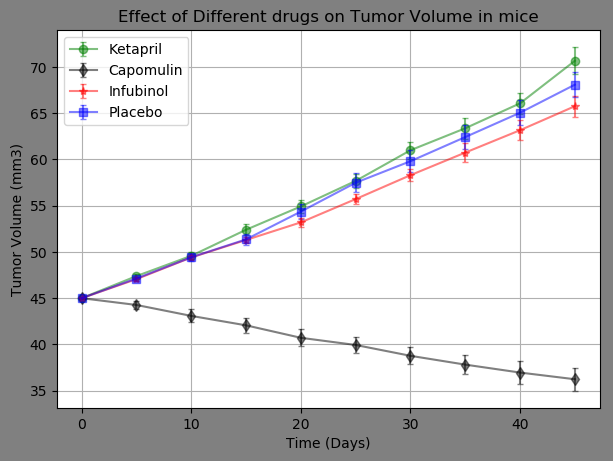

In [83]:
fig = plt.figure(figsize=(7,5),facecolor='gray',edgecolor='b',dpi=100)
ax1 = fig.add_subplot(111)

ax1.errorbar(x_axis, mtv['Tumor Volume (mm3)'].loc[mtv['Drug']==drugs[3]], capsize=2,
             yerr=mtv['SEM'].loc[mtv['Drug']==drugs[3]], c='g', marker="o", barsabove=True,label=drugs[3],alpha=0.5)

ax1.errorbar(x_axis, mtv['Tumor Volume (mm3)'].loc[mtv['Drug']==drugs[4]], capsize=2, 
             yerr=mtv['SEM'].loc[mtv['Drug']==drugs[4]], c='k', marker="d", label=drugs[4],alpha=0.5)

ax1.errorbar(x_axis, mtv['Tumor Volume (mm3)'].loc[mtv['Drug']==drugs[5]], capsize=2, 
             yerr=mtv['SEM'].loc[mtv['Drug']==drugs[5]], c='r', marker="*", label=drugs[5],alpha=0.5)

ax1.errorbar(x_axis, mtv['Tumor Volume (mm3)'].loc[mtv['Drug']==drugs[9]], capsize=2,
             yerr=mtv['SEM'].loc[mtv['Drug']==drugs[9]], c='b', marker="s", label=drugs[9],alpha=0.5)

plt.legend(loc='upper left')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Effect of Different drugs on Tumor Volume in mice')
plt.grid()
plt.savefig('figure1')
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
gb2=trial_df.groupby(['Drug','Timepoint'])
mms=pd.DataFrame(gb2['Metastatic Sites'].mean())

# Convert to DataFrame
# Preview DataFrame
mms.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem2=gb2['Metastatic Sites'].sem()
# Convert to DataFrame
sem2_df=pd.DataFrame(sem2)
# Preview DataFrame
sem2_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [69]:
# Minor Data Munging to Re-Format the Data Frames
mms_df=pd.DataFrame()
for i in range(len(drugs)):
    mms_df[drugs[i]]=mms['Metastatic Sites'].loc[drugs[i]]
# Preview that Reformatting worked
mms_err=pd.DataFrame()
for drug in drugs:
    mms_err[drug]=sem2_df['Metastatic Sites'].loc[drug]
mms_df

,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.240000,0.320000,0.260870,0.304348,0.160000,0.280000,0.380952,0.166667,0.120000,0.375000
10,0.478261,0.565217,0.523810,0.590909,0.320000,0.666667,0.600000,0.500000,0.250000,0.833333
15,0.782609,0.764706,0.857143,0.842105,0.375000,0.904762,0.789474,0.809524,0.333333,1.250000
20,0.952381,1.000000,1.150000,1.210526,0.652174,1.050000,1.111111,1.294118,0.347826,1.526316
25,1.157895,1.357143,1.500000,1.631579,0.818182,1.277778,1.500000,1.687500,0.652174,1.941176
30,1.388889,1.615385,2.066667,2.055556,1.090909,1.588235,1.937500,1.933333,0.782609,2.266667
35,1.562500,2.300000,2.266667,2.294118,1.181818,1.666667,2.071429,2.285714,0.952381,2.642857
40,1.583333,2.777778,2.466667,2.733333,1.380952,2.100000,2.357143,2.785714,1.100000,3.166667


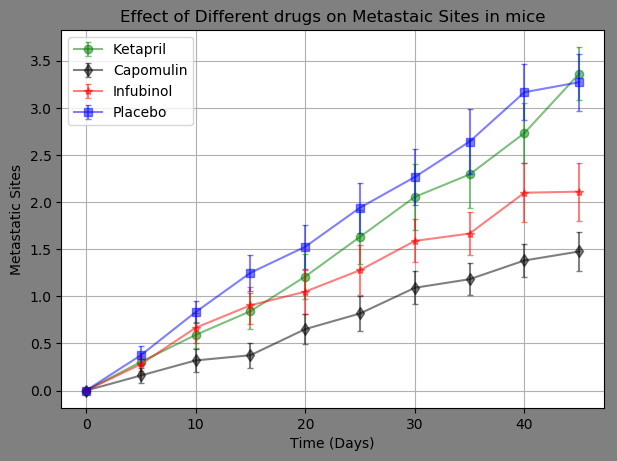

In [84]:
fig = plt.figure(figsize=(7,5),facecolor='gray',edgecolor='b',dpi=100)
ax1 = fig.add_subplot(111)


ax1.errorbar(x_axis, mms_df[drugs[3]], yerr=mms_err[drugs[3]],
             capsize=2, c='g', marker="o", barsabove=True,label=drugs[3],alpha=0.5)

ax1.errorbar(x_axis, mms_df[drugs[4]], yerr=mms_err[drugs[4]],
             capsize=2, c='k', marker="d", label=drugs[4],alpha=0.5)

ax1.errorbar(x_axis, mms_df[drugs[5]], yerr=mms_err[drugs[5]],
             capsize=2, c='r', marker="*", label=drugs[5],alpha=0.5)

ax1.errorbar(x_axis, mms_df[drugs[9]], yerr=mms_err[drugs[9]],
             capsize=2, c='b', marker="s", label=drugs[9],alpha=0.5)

plt.legend(loc='upper left')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Effect of Different drugs on Metastaic Sites in mice')
plt.grid()
plt.savefig('figure2')
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
gb3=trial_df.groupby(['Drug','Timepoint'])
# Convert to DataFrame
sr=pd.DataFrame(gb3['Mouse ID'].count())
# Preview DataFrame
sr.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
sr_df=pd.DataFrame()
for drug in drugs:
    sr_df[drug]=sr['Mouse ID'].loc[drug]
sr_df.head()

# Preview the Data Frame


,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,26,26,25,25,25,25,25,25,25,25
5,25,25,23,23,25,25,21,24,25,24
10,23,23,21,22,25,21,20,22,24,24
15,23,17,21,19,24,21,19,21,24,20
20,21,17,20,19,23,20,18,17,23,19


In [12]:
# sr_percent=sr_df/25*100
# sr_percent
sr_percent=pd.DataFrame()
for drug in drugs:
    sr_percent[drug]=round(sr_df[drug]/sr_df[drug].iloc[0]*100,2)
sr_percent

,Stelasyn,Propriva,Naftisol,Ketapril,Capomulin,Infubinol,Ceftamin,Zoniferol,Ramicane,Placebo
Timepoint,,,,,,,,,,
0,100.00,100.00,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,96.15,96.15,92.0,92.0,100.0,100.0,84.0,96.0,100.0,96.0
10,88.46,88.46,84.0,88.0,100.0,84.0,80.0,88.0,96.0,96.0
15,88.46,65.38,84.0,76.0,96.0,84.0,76.0,84.0,96.0,80.0
20,80.77,65.38,80.0,76.0,92.0,80.0,72.0,68.0,92.0,76.0
25,73.08,53.85,72.0,76.0,88.0,72.0,72.0,64.0,92.0,68.0
30,69.23,50.00,60.0,72.0,88.0,68.0,64.0,60.0,92.0,60.0
35,61.54,38.46,60.0,68.0,88.0,48.0,56.0,56.0,84.0,56.0
40,46.15,34.62,60.0,60.0,84.0,40.0,56.0,56.0,80.0,48.0


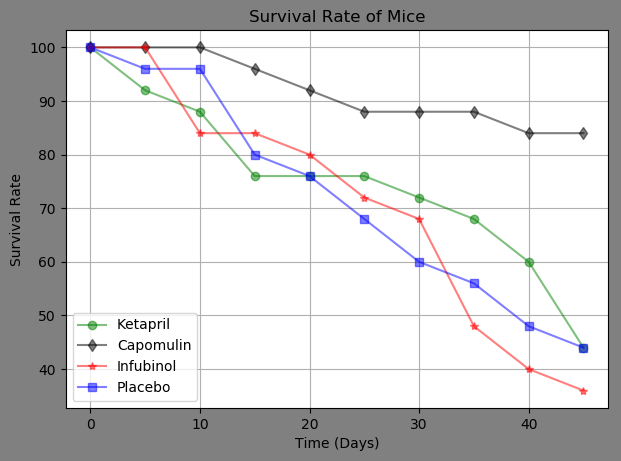

In [88]:
fig = plt.figure(figsize=(7,5),facecolor='gray',edgecolor='b',dpi=100)
ax1 = fig.add_subplot(111)


ax1.plot(x_axis, sr_percent[drugs[3]],
             c='g', marker="o", label=drugs[3],alpha=0.5)

ax1.plot(x_axis, sr_percent[drugs[4]],
             c='k', marker="d", label=drugs[4],alpha=0.5)

ax1.plot(x_axis, sr_percent[drugs[5]],
             c='r', marker="*", label=drugs[5],alpha=0.5)

ax1.plot(x_axis, sr_percent[drugs[9]],
             c='b', marker="s", label=drugs[9],alpha=0.5)

plt.legend(loc='lower left')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate of Mice')
plt.grid()
plt.savefig('figure3')
plt.show()

## Summary Bar Graph

In [31]:
# Calculate the percent changes for each drug
mtv2=pd.DataFrame(gb['Tumor Volume (mm3)'].mean())

tumor_change=[]
for drug in drugs:
    tumor_change.append(round((mtv2['Tumor Volume (mm3)'].loc[drug][45]-45)/45*100,2))
# tumor_change
tumor_change

[52.09, 47.24, 53.92, 57.03, -19.48, 46.12, 42.52, 46.58, -22.32, 51.3]

In [29]:
tumor_df=pd.DataFrame({'Drug':drugs,
                      "Percent Tumor Change":tumor_change})
tumor_df

,Drug,Percent Tumor Change
0,Stelasyn,52.09
1,Propriva,47.24
2,Naftisol,53.92
3,Ketapril,57.03
4,Capomulin,-19.48
5,Infubinol,46.12
6,Ceftamin,42.52
7,Zoniferol,46.58
8,Ramicane,-22.32
9,Placebo,51.30


In [98]:
tumor_df.sort_values('Percent Tumor Change')
bar_df=pd.DataFrame({'Drug':[tumor_df['Drug'].loc[4],tumor_df['Drug'].loc[5],
                            tumor_df['Drug'].loc[9],tumor_df['Drug'].loc[3]],
                    'Percent Tumor Change':[tumor_df['Percent Tumor Change'].loc[4],
                                            tumor_df['Percent Tumor Change'].loc[5],
                                            tumor_df['Percent Tumor Change'].loc[9],
                                            tumor_df['Percent Tumor Change'].loc[3]]})
bar_df

,Drug,Percent Tumor Change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Placebo,51.30
3,Ketapril,57.03


In [33]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()
change_t

(array(['Stelasyn', 'Propriva', 'Naftisol', 'Ketapril', 'Capomulin',
        'Infubinol', 'Ceftamin', 'Zoniferol', 'Ramicane', 'Placebo'],
       dtype=object),
 [52.09, 47.24, 53.92, 57.03, -19.48, 46.12, 42.52, 46.58, -22.32, 51.3])

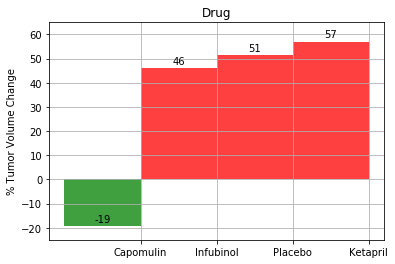

In [134]:
fig, ax = plt.subplots()

ind=np.arange(4)
width = 1  

rects1 = ax.bar(bar_df['Drug'].loc[0], bar_df['Percent Tumor Change'].loc[0],
                width, color='g',alpha=0.75)

rects2 = ax.bar(bar_df['Drug'].loc[1:], bar_df['Percent Tumor Change'].loc[1:],
                width, color='r',alpha=0.75)

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Drug')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(bar_df['Drug'])
ax.grid()
ax.set_ylim(-25,65)

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1, ax)
autolabel(rects2, ax)


plt.savefig('figure4')
plt.show()